In [1]:
import cv2
import numpy as np
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage import color
from skimage import feature
import matplotlib.pyplot as plt
from skimage import measure
from commonfunctions import *

In [2]:
def staff_removal(in_img, thresh):
    filterOne = np.array([[0, 0, 0],[1, 1, 1],[0, 0, 0]], np.uint8)
    filterTwo = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], np.uint8)
    erosion = cv2.erode(in_img, filterOne, iterations=1)
    outputImg = cv2.dilate(erosion, filterTwo, iterations=1)

    return outputImg;

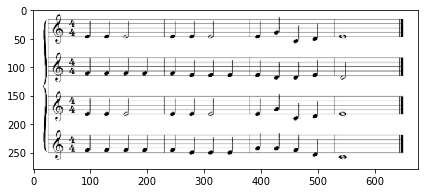

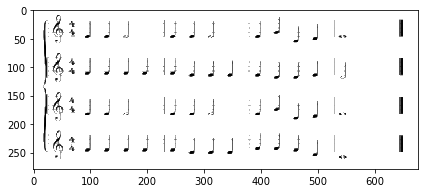

In [3]:
in_img = io.imread('sample.png', as_gray=True)
thresh = threshold_otsu(in_img)
binary = in_img.copy()
binary[binary > thresh] = 1

out_img = staff_removal(binary.copy(), thresh)

io.imshow(in_img)
io.show()


io.imsave('./output.jpg', (out_img * 255).astype(np.uint8))
io.imshow(out_img)
io.show()

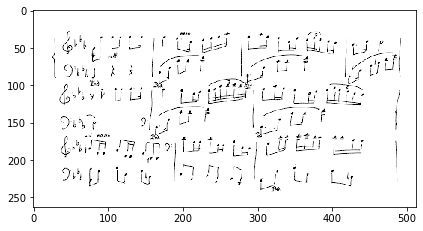

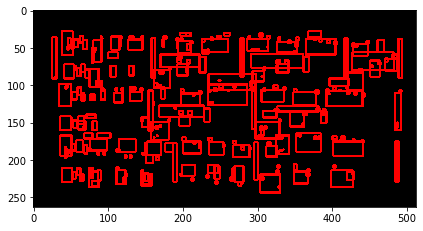

In [4]:
''' file name : findcontours.py
Description : This sample shows how to find and draw contours
This is Python version of this tutorial : http://opencv.itseez.com/doc/tutorials/imgproc/shapedescriptors/find_contours/find_contours.html#find-contours
Level : Beginner
Benefits : Learn to use 1) cv2.findContours() and 2)cv2.drawContours()
Usage : python findcontours.py
Written by : Abid K. (abidrahman2@gmail.com) , Visit opencvpython.blogspot.com for more tutorials'''

import cv2
import numpy as np
import skimage.io as io

def thresh_callback(thresh):
    edges = cv2.Canny(gray,thresh,thresh*2)
    drawing = np.zeros(img.shape,np.uint8)     # Image to draw the contours
    contours,hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    

    one_contour = np.zeros(img.shape,np.uint8)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
    
        thickness = 2
        color = (255, 0, 0) 
        one_contour = cv2.rectangle(one_contour, (x, y), (x + w, y + h), color, thickness) 
    io.imshow(gray)
    io.show()
    io.imshow(one_contour)
    io.show()
#     filterTwo = np.array([[0, 0, 0],[1, 1, 1],[0, 0, 0]], np.uint8)
# #     outputImg = cv2.dilate(one_contour, filterTwo, iterations=1)
#     io.imshow(outputImg)
#     io.show()
    

img = cv2.imread('unnamed.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# cv2.namedWindow('input',cv2.WINDOW_AUTOSIZE)

thresh = 100
max_thresh = 255

# cv2.createTrackbar('canny thresh:','input',thresh,max_thresh,thresh_callback)

thresh_callback(thresh)

if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()


In [5]:
import numpy as np
import cv2

original_image = cv2.imread("output.png")
image = original_image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY_INV)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.dilate(thresh, kernel , iterations=4)



cv2.imshow("thresh", thresh)
cv2.imshow("dilate", dilate)

# Find contours in the image
cnts = cv2.findContours(dilate.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

contours = []

threshold_min_area = 0
threshold_max_area = 3000

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if area > threshold_min_area and area < threshold_max_area:
#         cv2.drawContours(original_image,[c], 0, (0,255,0), 3)
        original_image = cv2.rectangle(original_image, (x,y), (x+w, y+h), (0,255,0),1)
        contours.append(c)

cv2.imshow("detected", original_image) 
print('contours detected: {}'.format(len(contours)))

if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

contours detected: 47


Steps:
1. ~Preprocessing~
    1. Geometical transformation
    2. Music score binarization based on domain knowledge
2. ~Staff line removal~
3. ~Segmentation and symbol detection~
4. Find start point (Y-Axis) of each symbol
5. Find reference lines
6. Symbol classification